In [1]:
%load_ext autoreload
%autoreload 2

In [3]:

import numpy
import random
import tifffile
import os

from matplotlib import pyplot

import sys
sys.path.insert(0, "..")
from datasets import TarFLCDataset


In [4]:
dataset = TarFLCDataset("./data/FLCDataset/20240214-dataset.tar", return_metadata=True)
print(len(dataset))

238683


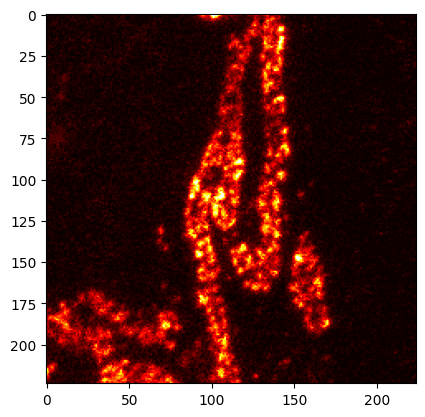

oferguson/Manual_Mitos/L8_2KO_3x_DIV60/INPUT/3x/L8_3x_msTH488_RbTom20_635_ON_Neuron1_03_.tif
tom20
135447


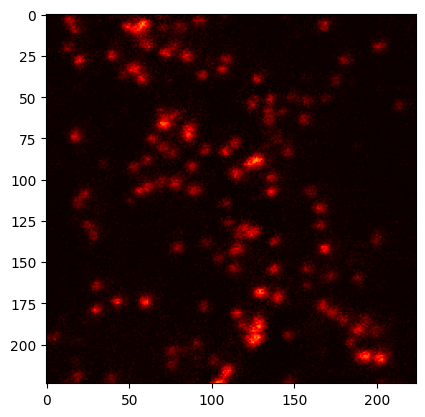

twiesner/synaptic-protein-paper/Basson-Rim/GluGly/R-Rim_GARSTAR635_M-Bassoon_GAMAlexa594_GluGly_07.tif
bassoon
179566


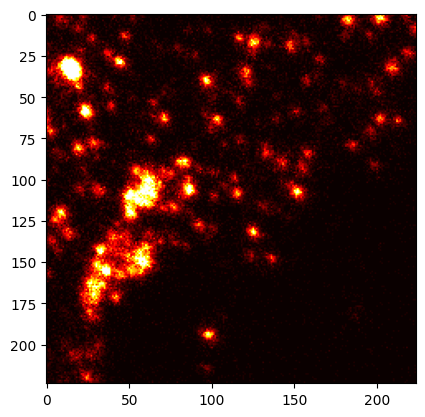

apelletierrioux/Maitrise/2023-08-03_Test_proteine_synaptique_N3/2023-08-03_VGAT gp_Atto490LS_cs1_N2.msr
vgat
1419


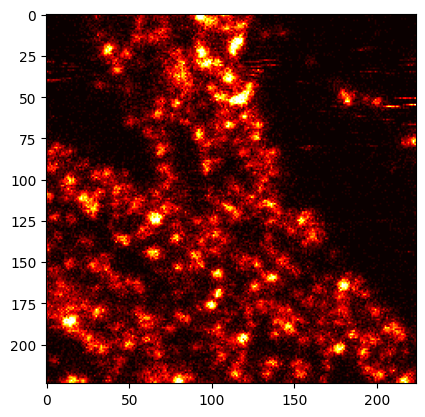

jchabbert/25-2023-02-20_Stim Actin + BCaMKII/25-SNAP-Actin/25-2023-02-20_LAM100k5k_SNAP-Actin_KCl_SNAP647_BCaMKIIA594-TauS488_cs1n10.msr
beta-camkii
34116


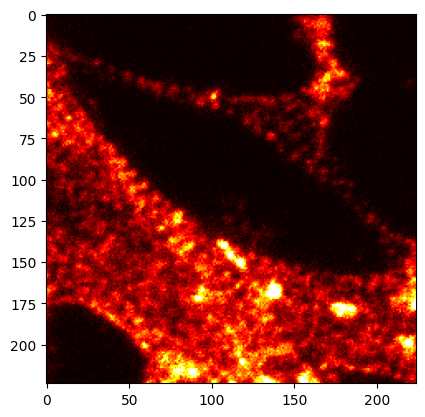

jchabbert/Tests/2023-09-07_Test-Fixation Glyoxal-Suc-EGTA/2023-09-07_PFA20/2023-09-07_PFA20_PH647_BCaMKIIA594-1-100_TauS488_cs1n1.msr
f-actin
45284


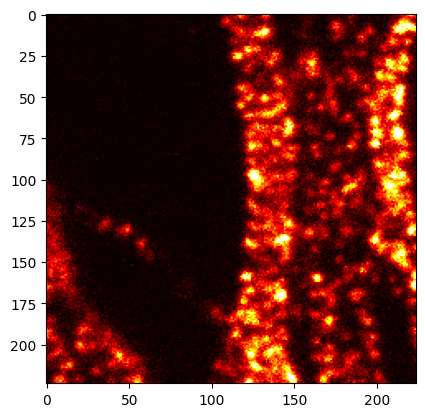

jchabbert/Tests/2024-01-12_Adducin_STIMS/2023-01-12_BlockGluGly_pAdducin/2024-01-17_BlockGluGly_pAdducin594-GPTau488-PH635_cs1n2.msr
adducin
49370


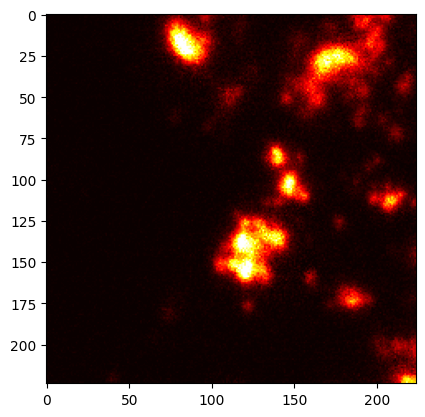

twiesner/synaptic-protein-paper/PSD95-Basson/Block/R-Bassoon_GARSTAR635_M-PSD95_GAMAlexa594_Block_11.tif
psd95
210581


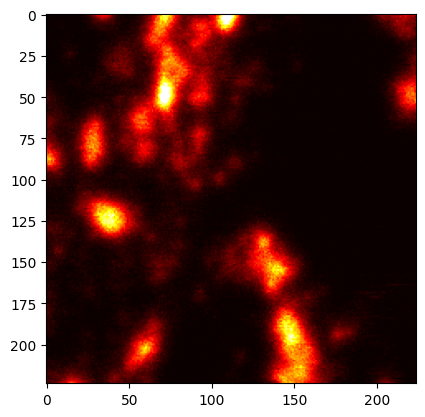

twiesner/synaptic-protein-paper/Basson-Homer/GluGly/R-Homer_GARSTAR635_M-Bassoon_GAMAlexa594_GluGly_09.tif
homer
155888


In [7]:
numpy.random.seed(43)
savedir = "./panels/examples-images"
os.makedirs(savedir, exist_ok=True)
    
choices = numpy.random.choice(range(len(dataset)), size=25, replace=False)
_choices = [135447, 179566, 1419, 34116, 45284, 49370, 210581, 155888]
for choice in _choices:
    
    img, metadata = dataset[choice]
    
    img = img.cpu().data.numpy().squeeze()
    fig, ax = pyplot.subplots()
    ax.imshow(img, cmap="hot", vmin=0, vmax=1)
    pyplot.show()
    
    print(metadata['image-id'])
    print(metadata['protein-id'])
    print(choice)
    tifffile.imwrite(os.path.join(savedir, f"{metadata['protein-id']}.tif"), (img * 255).astype(numpy.uint8))